In [1]:
# Standard modules
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

# Other modules
import sys
import time

# Import suftware
sys.path.append('../../')
import suftware as sw

In [2]:
# Get list of datasets
who_datasets = [name for name in sw.example_data_1d__datasets if 'who.' in name]
who_datasets

['who.life_expectancy_male',
 'who.family_planning_needs_met',
 'who.tb_incidence',
 'who.under_five_mortatility',
 'who.suicide_mortality',
 'who.adolescent_birth_rate',
 'who.life_expectancy_female',
 'who.alcohol_consumption',
 'who.healthy_life_expectancy',
 'who.maternal_mortaility',
 'who.new_hiv_infections',
 'who.hepatitis_b_vaccination',
 'who.population',
 'who.attended_births',
 'who.malaria',
 'who.road_traffic_mortality',
 'who.neonatal_mortality',
 'who.life_expectancy_all']

Deft1D computation took 0.391632 sec
Deft1D computation took 0.335589 sec
Deft1D computation took 0.235188 sec
Deft1D computation took 0.231865 sec
Deft1D computation took 0.208648 sec
Deft1D computation took 0.169832 sec
Deft1D computation took 0.240054 sec
Deft1D computation took 0.201280 sec
Deft1D computation took 0.231288 sec
Deft1D computation took 0.285481 sec
Deft1D computation took 0.254301 sec
Deft1D computation took 0.153925 sec
Deft1D computation took 0.219369 sec
Deft1D computation took 0.231559 sec
Deft1D computation took 0.229279 sec
Deft1D computation took 0.231409 sec
Deft1D computation took 0.209978 sec
Deft1D computation took 0.242756 sec


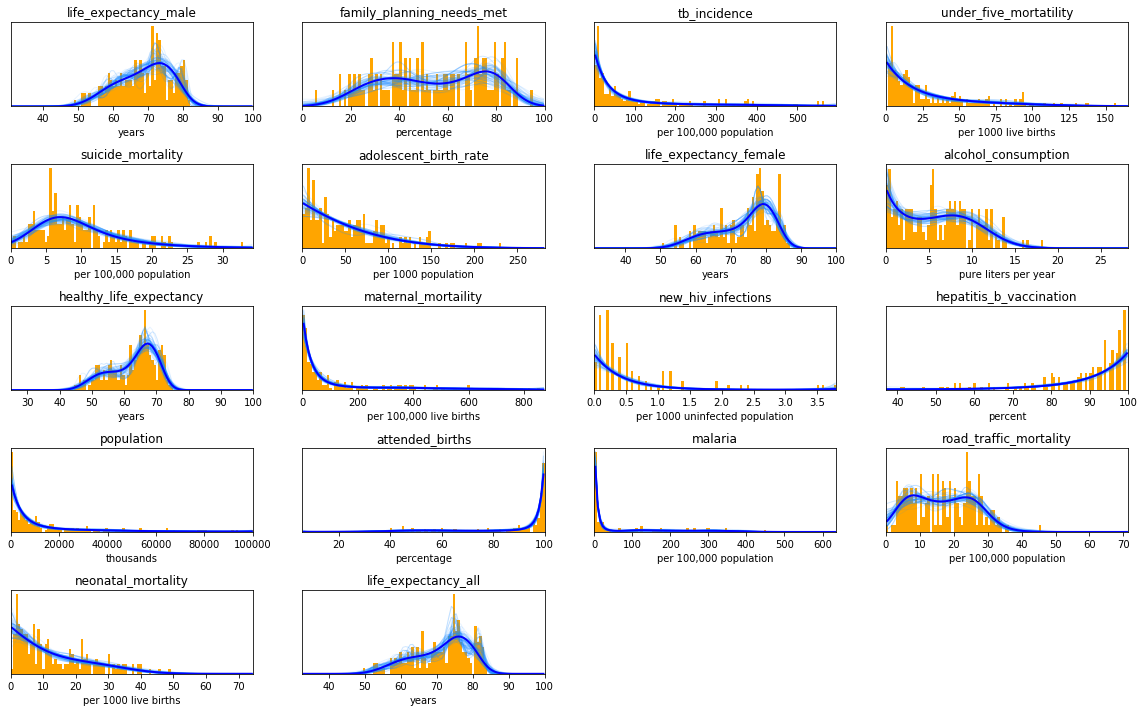

In [3]:
# Simulate data
#data = ft.simulate_data_1d(distribution_type='gaussian', N=10000)

num_rows = 5
num_cols = 4
v_in_per = 2
h_in_per = 4
fig, axs = plt.subplots(num_rows, num_cols,figsize=[h_in_per*num_cols, v_in_per*num_rows])
axs = axs.ravel()

# Default each axis to off
for ax in axs:
    ax.axis('off')
    
# Plot each dataset
for n, dataset in enumerate(who_datasets):

    # Use example data
    data, details = sw.example_data_1d(dataset, return_details=True)
    #bbox = details['bbox']
    #print(details)

    # Perform density estimation
    start = time.time()
    Q = sw.Density1D(data)
    print('Deft1D computation took %f sec'%(time.time()-start))

    ax = axs[n]
    ax.axis('on')
    
    # Plot histogram
    ax.bar(Q.grid, Q.histogram, width=Q.grid_spacing, color='orange')

    # Plot Q_samples
    if Q.num_posterior_samples > 0:
        ax.plot(Q.grid, Q.sample_values, color='dodgerblue', linewidth=1, alpha = .1)

    # Plot Q_star
    ax.plot(Q.grid, Q.evaluate(Q.grid), color='b', linewidth=2)

    # Style plot
    ax.set_xlim(Q.bounding_box)
    ax.set_title(details['description'])
    ax.set_xlabel(details['units'])
    ax.set_yticks([])
    
plt.tight_layout()
fig.savefig('who_data.png')
plt.show()